## Course Work

Dota 2 is a computer game in the MOBA (Multiplayer Online Battle Arena) genre. It is played by two teams, called Radiant and Dire which consist of five players each. The main goal of the game is to destroy other team's “Ancient", located at the opposite corners of the map. Matches are generated from a queue, taking into account the level of the game all players, known as MMR (Match Making Rank).

Each player earns gold and experience during the game, gets items and performs kills. Information about each match includes statistics of each player and of the whole team.

Your goal is to predict an outcome of the match: whether radiant win or lose

Train and Test Data fields

    match_id - an identifier of a match
    radiant_win - outcome of the match (train set only)
    hero - hero chosen by player (goes with prefix r1-r5 for radiant and d1-d5 for dire)
    level - level of a player
    xp - xp gained by the player
    gold - amount of gold acquired by the player
    lh - number of neutral creatures killed by the player
    kills - number of kills performed by the player
    deaths - times the player died
    items - number of items obtained by the player


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_db = pd.read_csv("train_db.csv")
test_db = pd.read_csv("test_db.csv")

In [3]:
train_db.head()

,match_id,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,...,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win
0,0.0,62.0,0.0,611.0,608.0,2.0,0.0,7.0,9.0,97.0,...,194.0,-82.0,254.0,4.0,3.0,1.0,1.0,41.0,2336.0,1
1,1.0,21.0,0.0,1911.0,1743.0,29.0,0.0,6.0,8.0,98.0,...,60.0,-86.0,NaN,1.0,4.0,2.0,0.0,-17.0,3207.0,0
2,2.0,11.0,0.0,886.0,1127.0,14.0,0.0,14.0,9.0,104.0,...,NaN,-86.0,277.0,6.0,2.0,2.0,0.0,23.0,3025.0,0
3,3.0,31.0,0.0,1539.0,669.0,4.0,0.0,10.0,7.0,14.0,...,76.0,-73.0,NaN,4.0,5.0,2.0,0.0,158.0,2192.0,1
4,4.0,47.0,2.0,1947.0,1378.0,19.0,0.0,5.0,6.0,112.0,...,-68.0,-73.0,NaN,4.0,1.0,0.0,0.0,NaN,2385.0,1


In [4]:
train_db.describe()

,match_id,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,...,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win
count,327828.000000,327828.000000,327828.000000,327828.000000,327828.000000,327828.000000,327828.000000,327828.000000,327828.000000,327828.000000,...,252770.000000,322125.000000,181198.000000,327828.000000,327828.000000,327828.000000,327828.000000,292688.000000,327828.000000,327828.000000
mean,204754.444453,51.264791,0.627036,1267.865249,1148.955089,10.858048,0.393508,6.261710,7.933764,51.383180,...,120.504368,-66.264040,220.390920,2.927456,3.226015,1.944547,0.333898,11.588022,2495.303409,0.517616
std,118269.235335,33.189737,0.786656,505.298260,428.045185,8.038465,0.694567,3.943956,2.558590,33.225628,...,75.526250,36.285616,35.848441,1.868595,1.138479,0.970488,0.617262,57.654802,640.196240,0.499690
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-88.000000,-90.000000,180.000000,0.000000,0.000000,0.000000,0.000000,-293.000000,1200.000000,0.000000
25%,102246.750000,21.000000,0.000000,895.000000,817.000000,4.000000,0.000000,3.000000,6.000000,21.000000,...,76.000000,-83.000000,188.000000,2.000000,2.000000,2.000000,0.000000,-22.000000,2030.000000,0.000000
50%,204752.500000,49.000000,0.000000,1180.000000,1105.000000,10.000000,0.000000,6.000000,8.000000,49.000000,...,129.000000,-74.000000,210.000000,3.000000,3.000000,2.000000,0.000000,-3.000000,2429.000000,1.000000
75%,307165.250000,75.000000,1.000000,1650.000000,1421.000000,17.000000,1.000000,9.000000,10.000000,76.000000,...,167.000000,-63.000000,248.000000,4.000000,4.000000,2.000000,1.000000,20.000000,2893.000000,1.000000
max,409785.000000,112.000000,5.000000,3470.000000,4616.000000,51.000000,8.000000,44.000000,44.000000,112.000000,...,300.000000,300.000000,300.000000,25.000000,8.000000,16.000000,36.000000,300.000000,7283.000000,1.000000


In [5]:
X = train_db.loc[:, train_db.columns != 'radiant_win']
Y = train_db.loc[:, train_db.columns == 'radiant_win']

In [6]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=RANDOM_SEED)

In [7]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
X_train_new = pd.DataFrame(my_imputer.fit_transform(X_train))
X_test_new = pd.DataFrame(my_imputer.fit_transform(X_test))

(array([17486., 31353., 11807., 22609., 14953., 13505., 13582., 14311.,
        14347., 11421., 13562.,  7330., 23976., 13871.,  7125., 12221.,
        10357., 14363., 17164.,  9702.]),
 array([  1.  ,   6.55,  12.1 ,  17.65,  23.2 ,  28.75,  34.3 ,  39.85,
         45.4 ,  50.95,  56.5 ,  62.05,  67.6 ,  73.15,  78.7 ,  84.25,
         89.8 ,  95.35, 100.9 , 106.45, 112.  ]),
 <BarContainer object of 20 artists>)

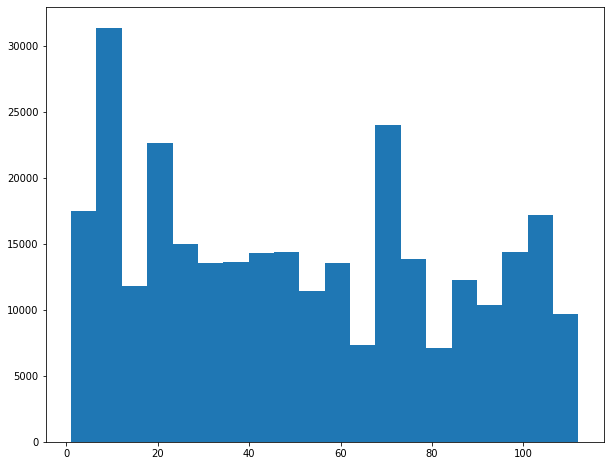

In [8]:
plt.figure(figsize=(10,8))
plt.hist(X_train_new[1], bins=20)

(array([8.3700e+02, 3.0730e+03, 9.6240e+03, 2.0200e+04, 3.3625e+04,
        4.5287e+04, 4.2353e+04, 3.1227e+04, 2.4025e+04, 2.1612e+04,
        2.1530e+04, 2.0779e+04, 1.3156e+04, 5.2270e+03, 1.7910e+03,
        5.4300e+02, 1.2800e+02, 1.7000e+01, 6.0000e+00, 5.0000e+00]),
 array([   0. ,  173.5,  347. ,  520.5,  694. ,  867.5, 1041. , 1214.5,
        1388. , 1561.5, 1735. , 1908.5, 2082. , 2255.5, 2429. , 2602.5,
        2776. , 2949.5, 3123. , 3296.5, 3470. ]),
 <BarContainer object of 20 artists>)

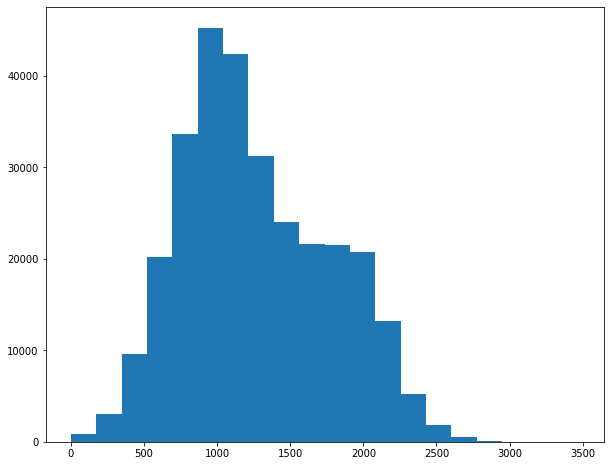

In [9]:
plt.figure(figsize=(10,8))
plt.hist(X_train_new[3], bins=20)

<AxesSubplot:>

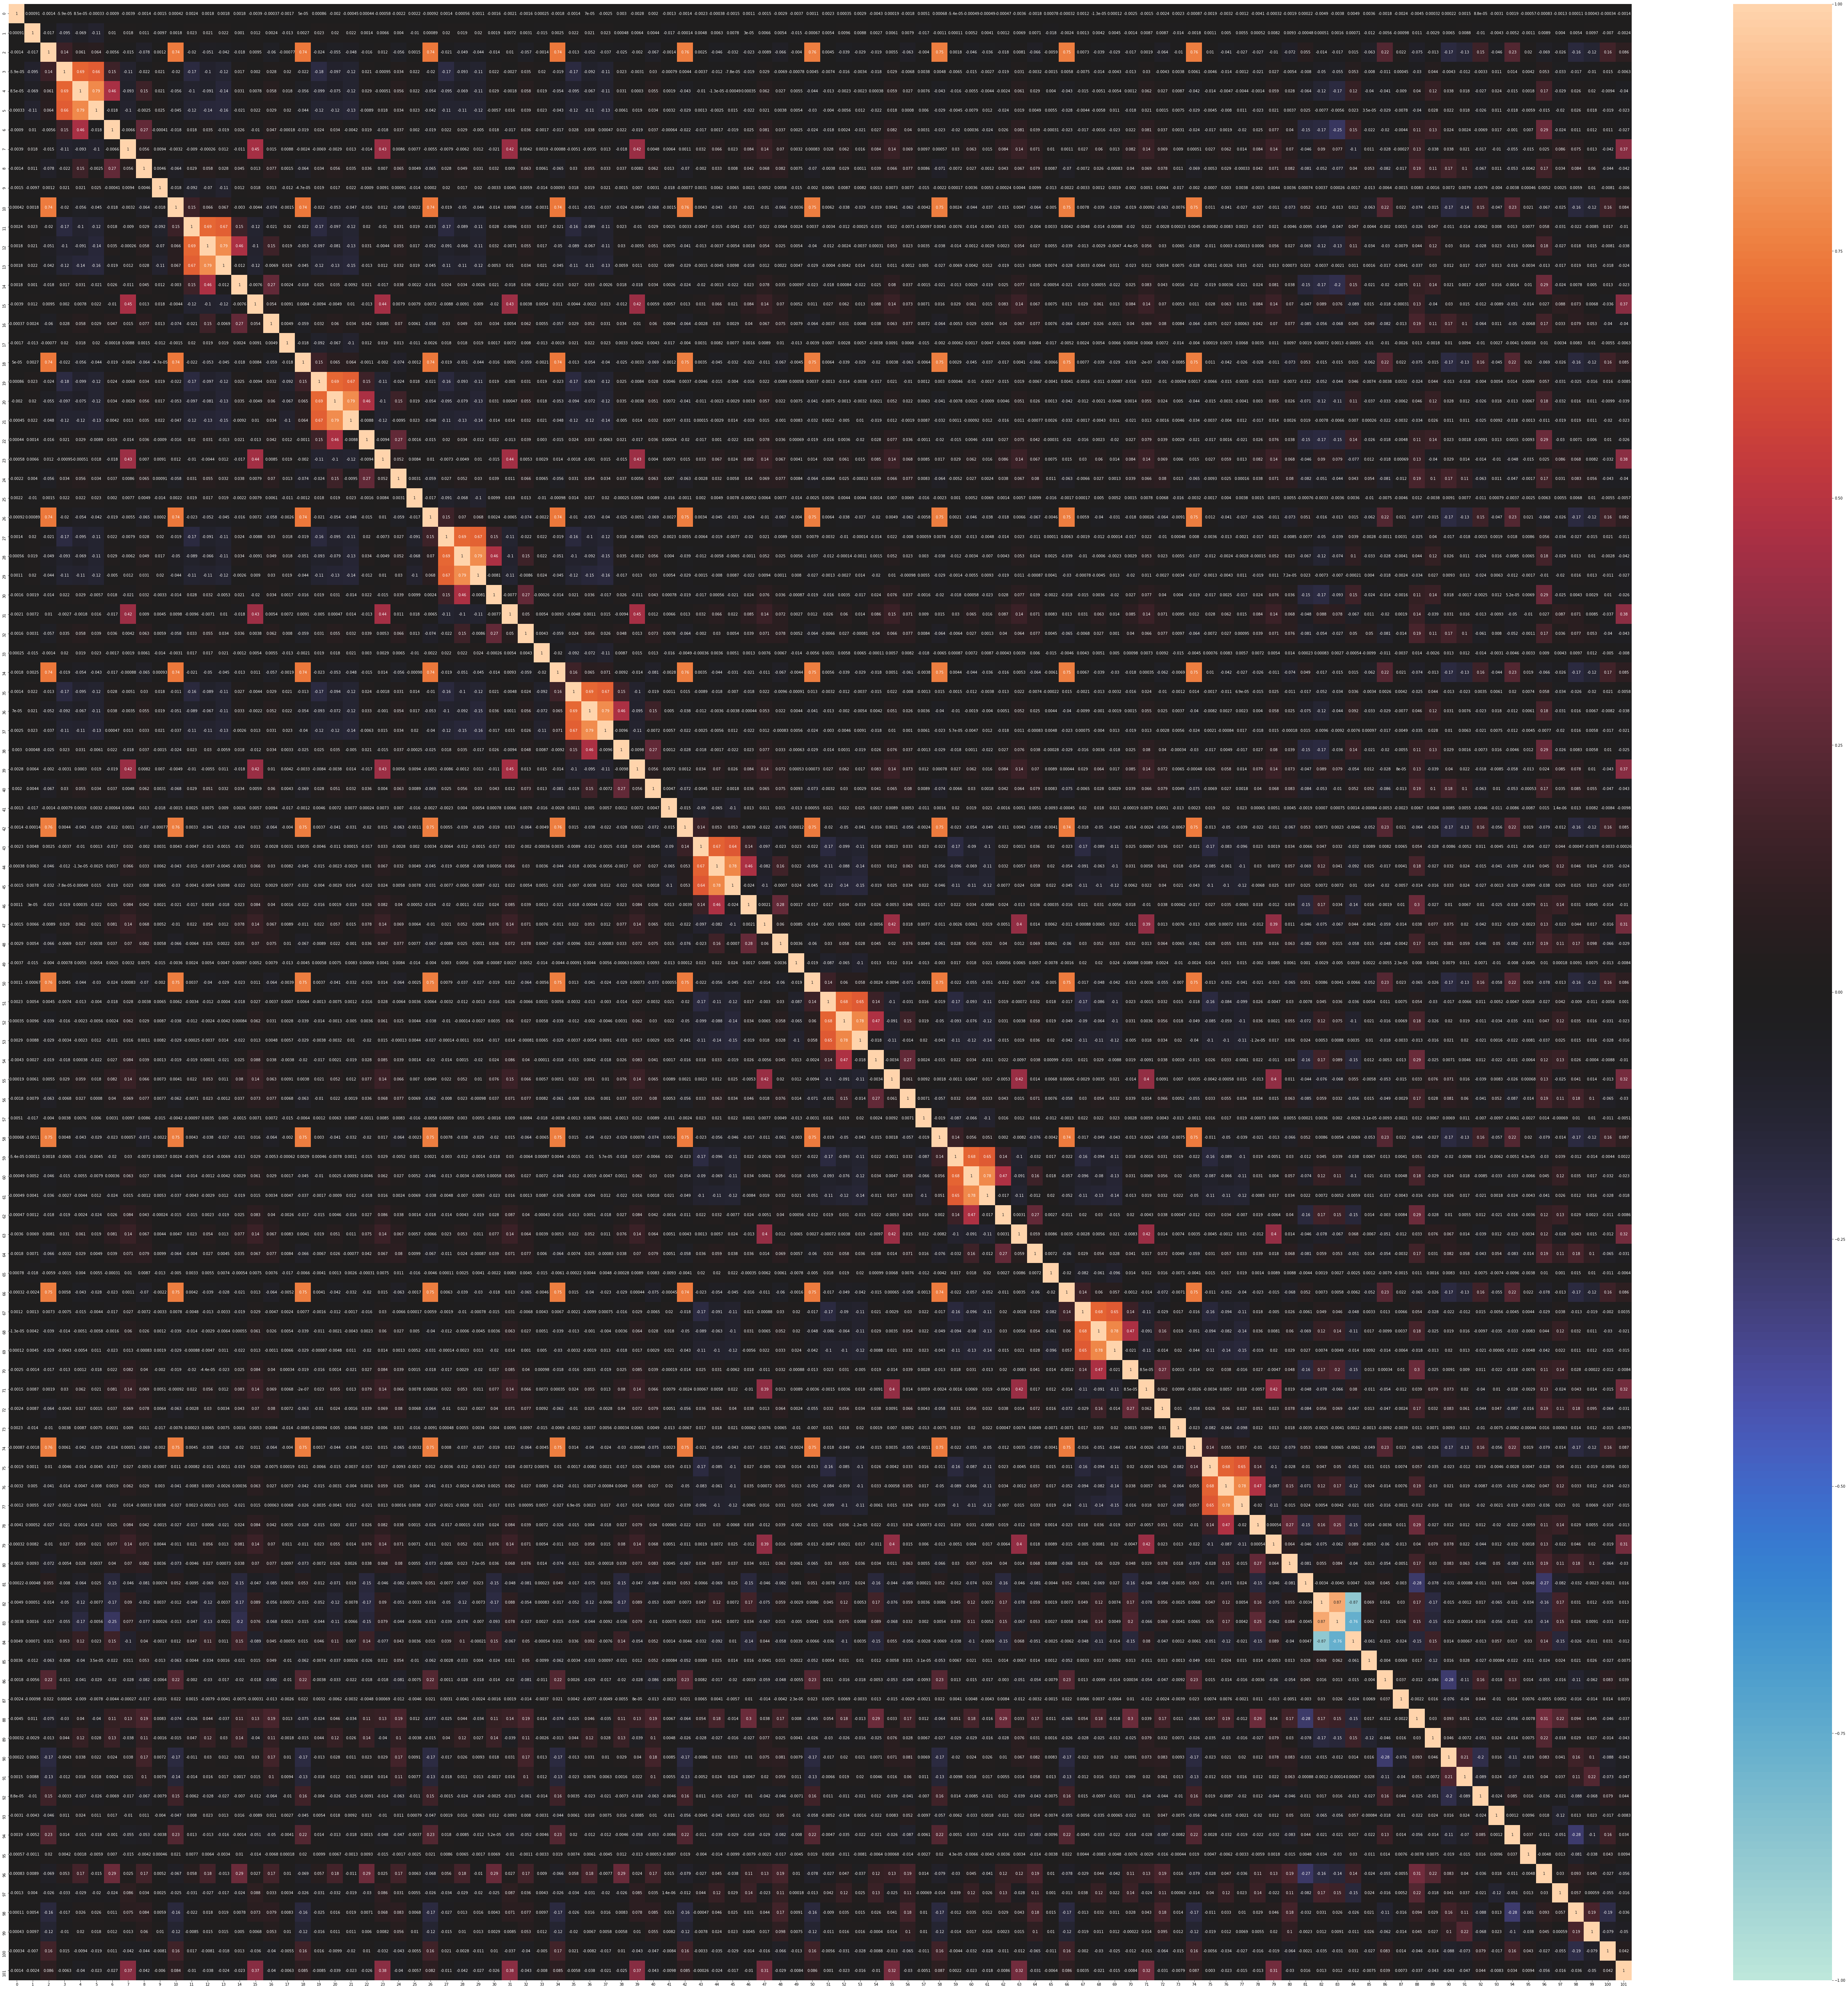

In [10]:
import seaborn as sns
plt.figure(figsize=(100, 100))
sns.heatmap(X_train_new.corr(), annot = True, vmin=-1, vmax=1, center= 0)

Import simple ML models

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [13]:
clf1 = KNeighborsClassifier()
clf2 = LogisticRegression()
clf3 = DecisionTreeClassifier()
clf4 = RandomForestClassifier()
clf5 = GaussianNB()

default_classifiers = [clf1, clf2, clf3, clf4, clf5]

In [14]:
clf_predictions = []
for clf in default_classifiers:
    clf.fit(X_train_new, Y_train)  
    pred = clf.predict(X_test_new)
    clf_predictions.append(pred)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documenta

In [15]:
accuracies = [accuracy_score(Y_test, pred) for pred in clf_predictions]
micro_precisions = [precision_score(Y_test, pred, average="micro", zero_division=1) for pred in clf_predictions] 
micro_recalls = [recall_score(Y_test, pred, average='micro', zero_division=1) for pred in clf_predictions]
macro_precisions = [precision_score(Y_test, pred, average="macro", zero_division=1) for pred in clf_predictions]
macro_recalls = [recall_score(Y_test, pred, average='macro', zero_division=1) for pred in clf_predictions]

scores = [accuracies, micro_precisions, micro_recalls, macro_precisions, macro_recalls]
names = ["Accuracies", "Micro-Precisions", "Micro-Recalls",  "Macro-Precisions", "Macro-Recalls"]

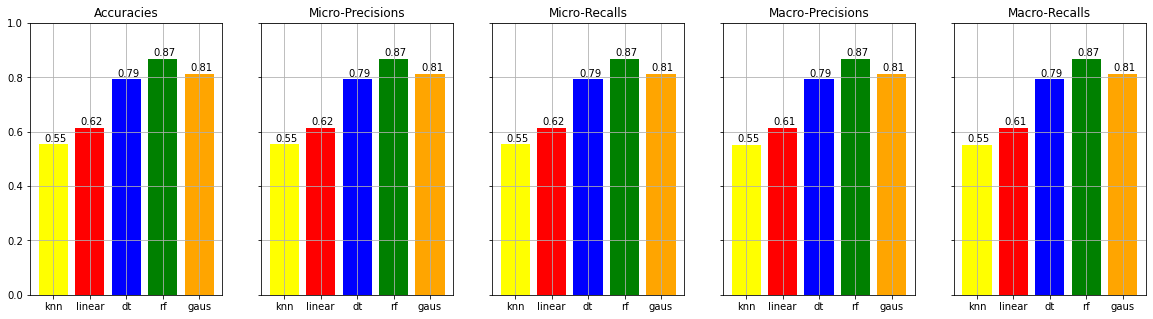

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=True)
plt.setp(axs, ylim=(0, 1))

xlabels = ["knn", "linear", "dt", "rf", "gaus"]
colors = ["yellow", "red", "blue", "green", "orange"]
xticks = 1 + np.arange(len(xlabels))

for ax, score, name in zip(axs, scores, names):
    ax.bar(xticks, score, color=colors)
    for i, v in enumerate(score):
        ax.text(xticks[i] - 0.25, v + 0.01, "{:.2f}".format(v))
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels)
    ax.set_title(name)
    ax.grid()

plt.show()

Take 3 the most of best value and look of their hyperparametrs

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**GaussianNB**

In [18]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [20]:
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train_new, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [21]:
res_gs = gs_NB.cv_results_

In [22]:
gs_means = res_gs['mean_test_score']
gs_stds = res_gs['std_test_score']

No handles with labels found to put in legend.


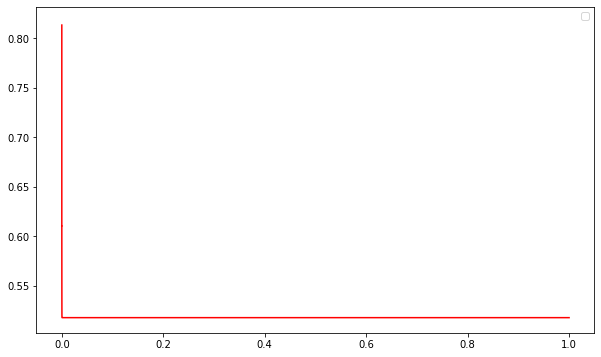

In [23]:
plt.figure(figsize=(10, 6))
xs = gs_NB.param_grid["var_smoothing"]
plt.plot(xs, gs_means, color='red')
plt.fill_between(xs, gs_means + 3 * gs_stds, gs_means - 3 * gs_stds)
plt.legend()
plt.show()

In [24]:
print("Best estimator:", gs_NB.best_estimator_, "its score:", gs_NB.best_score_)

Best estimator: GaussianNB() its score: 0.8131640936128388


**DecisionTreeClassifier**

In [35]:
tree_clf = DecisionTreeClassifier()
tree_grid = {
    "max_depth": np.arange(1,50)
}

In [36]:
tree_grid_searcher = GridSearchCV(tree_clf, tree_grid, cv=5, return_train_score=True)
tree_grid_searcher.fit(X_train_new, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             return_train_score=True)

In [39]:
res_tree = tree_grid_searcher.cv_results_

In [40]:
tree_means = res_tree['mean_test_score']
tree_stds = res_tree['std_test_score']

No handles with labels found to put in legend.


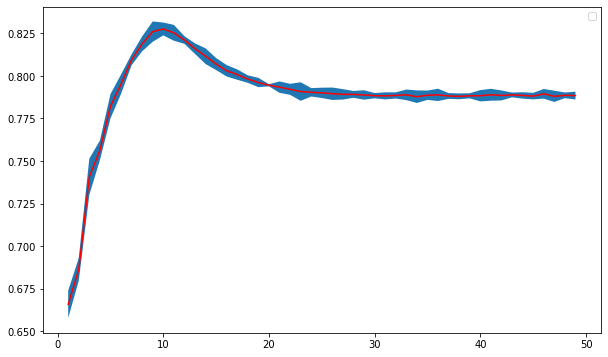

In [41]:
plt.figure(figsize=(10, 6))
xs = tree_grid_searcher.param_grid["max_depth"]
plt.plot(xs, tree_means, color='red')
plt.fill_between(xs, tree_means + 3 * tree_stds, tree_means - 3 * tree_stds)
plt.legend()
plt.show()

In [45]:
print("Best estimator:", tree_grid_searcher.best_estimator_, "its score:", tree_grid_searcher.best_score_)

Best estimator: DecisionTreeClassifier(max_depth=10) its score: 0.8276127370401125


**RandomForest**

In [50]:
forest_clf = RandomForestClassifier()
forest_grid = {
    "n_estimators": np.arange(10,50)
}

In [51]:
forest_grid_searcher = GridSearchCV(forest_clf, forest_grid, cv=5, return_train_score=True)
forest_grid_searcher.fit(X_train_new, Y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\user\appdata\local\programs\python\py

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49])},
             return_train_score=True)

In [52]:
res_forest = forest_grid_searcher.cv_results_

In [53]:
forest_means = res_forest['mean_test_score']
forest_stds = res_forest['std_test_score']

No handles with labels found to put in legend.


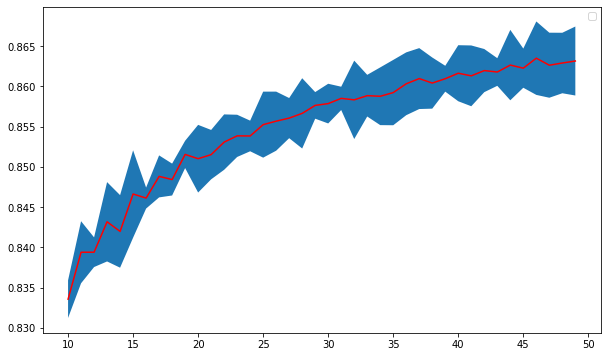

In [54]:
plt.figure(figsize=(10, 6))
xs = forest_grid_searcher.param_grid["n_estimators"]
plt.plot(xs, forest_means, color='red')
plt.fill_between(xs, forest_means + 3 * forest_stds, forest_means - 3 * forest_stds)
plt.legend()
plt.show()

In [55]:
print("Best estimator:", forest_grid_searcher.best_estimator_, "its score:", forest_grid_searcher.best_score_)

Best estimator: RandomForestClassifier(n_estimators=46) its score: 0.8635191242013931


**neural network**

In [25]:
# Keras specific
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical 

In [26]:
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=X_train_new.shape[1]))
#model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [27]:
# build the model
history = model.fit(X_train_new.values, Y_train.values, 
              epochs=10, 
              validation_data=(X_test_new, Y_test),
)

Epoch 1/10
9221/9221 [==============================] - 29s 3ms/step - loss: 82.4307 - accuracy: 0.6160 - val_loss: 17.6555 - val_accuracy: 0.6527
Epoch 2/10
9221/9221 [==============================] - 33s 4ms/step - loss: 18.9452 - accuracy: 0.7195 - val_loss: 4.4661 - val_accuracy: 0.8233
Epoch 3/10
9221/9221 [==============================] - 33s 4ms/step - loss: 10.7319 - accuracy: 0.7583 - val_loss: 2.2965 - val_accuracy: 0.8674
Epoch 4/10
9221/9221 [==============================] - 34s 4ms/step - loss: 6.4088 - accuracy: 0.7690 - val_loss: 6.4152 - val_accuracy: 0.6841
Epoch 5/10
9221/9221 [==============================] - 32s 3ms/step - loss: 3.1195 - accuracy: 0.7773 - val_loss: 9.0036 - val_accuracy: 0.6157
Epoch 6/10
9221/9221 [==============================] - 32s 3ms/step - loss: 1.7273 - accuracy: 0.7763 - val_loss: 0.4364 - val_accuracy: 0.8615
Epoch 7/10
9221/9221 [==============================] - 31s 3ms/step - loss: 0.8385 - accuracy: 0.7875 - val_loss: 1.9805 - va